In [1]:
#required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [2]:
#csv file load
soil_data = pd.read_csv('soil.csv')
soil_data

,District,Zn %,Fe %,Cu %,Mn %,B %,S %
0,Anantapur,67.67,65.14,91.88,77.70,73.54,85.90
1,Chittoor,80.51,78.19,99.77,91.82,89.04,88.62
2,East Godavari,79.27,88.14,95.54,97.24,88.05,95.67
3,Guntur,58.30,71.16,98.86,91.40,86.15,86.81
4,Krishna,78.62,82.02,98.05,95.23,65.78,98.56
...,...,...,...,...,...,...,...
668,Birbhum,93.95,100.00,98.63,97.06,78.52,22.07
669,KALIMPONG,100.00,100.00,100.00,84.81,100.00,62.50
670,Maldah,98.56,93.78,97.61,68.60,81.34,44.98
671,Murshidabad,96.36,99.59,100.00,94.31,87.85,36.84


In [3]:
#drop the training example with missing rows
soil_data.dropna(inplace=True)
soil_data


,District,Zn %,Fe %,Cu %,Mn %,B %,S %
0,Anantapur,67.67,65.14,91.88,77.70,73.54,85.90
1,Chittoor,80.51,78.19,99.77,91.82,89.04,88.62
2,East Godavari,79.27,88.14,95.54,97.24,88.05,95.67
3,Guntur,58.30,71.16,98.86,91.40,86.15,86.81
4,Krishna,78.62,82.02,98.05,95.23,65.78,98.56
...,...,...,...,...,...,...,...
668,Birbhum,93.95,100.00,98.63,97.06,78.52,22.07
669,KALIMPONG,100.00,100.00,100.00,84.81,100.00,62.50
670,Maldah,98.56,93.78,97.61,68.60,81.34,44.98
671,Murshidabad,96.36,99.59,100.00,94.31,87.85,36.84


In [4]:
soil_data.columns

Index(['District', 'Zn %', 'Fe %', 'Cu %', 'Mn %', 'B %', 'S %'], dtype='object')

In [5]:
# Select the columns to be scaled
columns_to_scale = soil_data.columns[1:]  # All columns except the first one which is 'District'

# Divide the selected columns by 100
soil_data[columns_to_scale] = soil_data[columns_to_scale] / 100

# Verify the changes
soil_data


,District,Zn %,Fe %,Cu %,Mn %,B %,S %
0,Anantapur,0.6767,0.6514,0.9188,0.7770,0.7354,0.8590
1,Chittoor,0.8051,0.7819,0.9977,0.9182,0.8904,0.8862
2,East Godavari,0.7927,0.8814,0.9554,0.9724,0.8805,0.9567
3,Guntur,0.5830,0.7116,0.9886,0.9140,0.8615,0.8681
4,Krishna,0.7862,0.8202,0.9805,0.9523,0.6578,0.9856
...,...,...,...,...,...,...,...
668,Birbhum,0.9395,1.0000,0.9863,0.9706,0.7852,0.2207
669,KALIMPONG,1.0000,1.0000,1.0000,0.8481,1.0000,0.6250
670,Maldah,0.9856,0.9378,0.9761,0.6860,0.8134,0.4498
671,Murshidabad,0.9636,0.9959,1.0000,0.9431,0.8785,0.3684


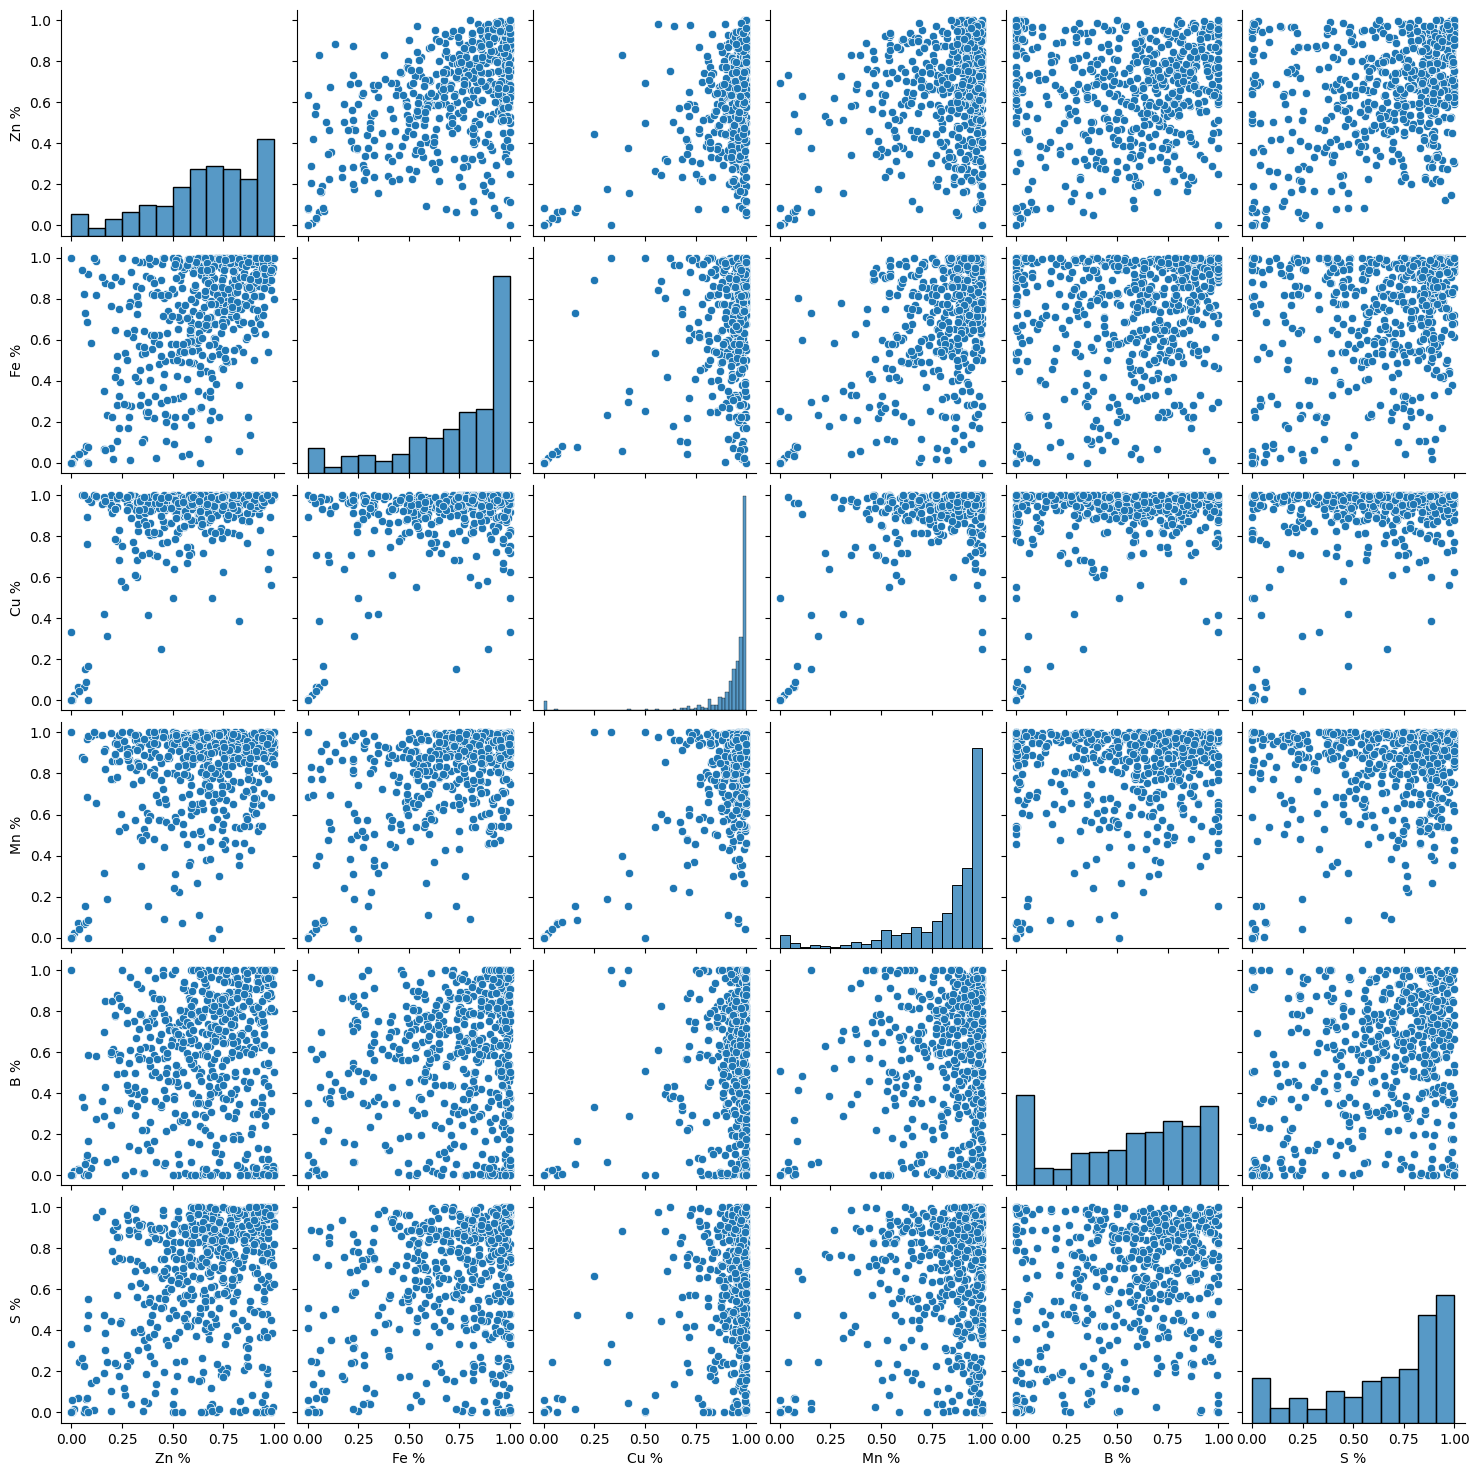

In [6]:
sns.pairplot(soil_data)

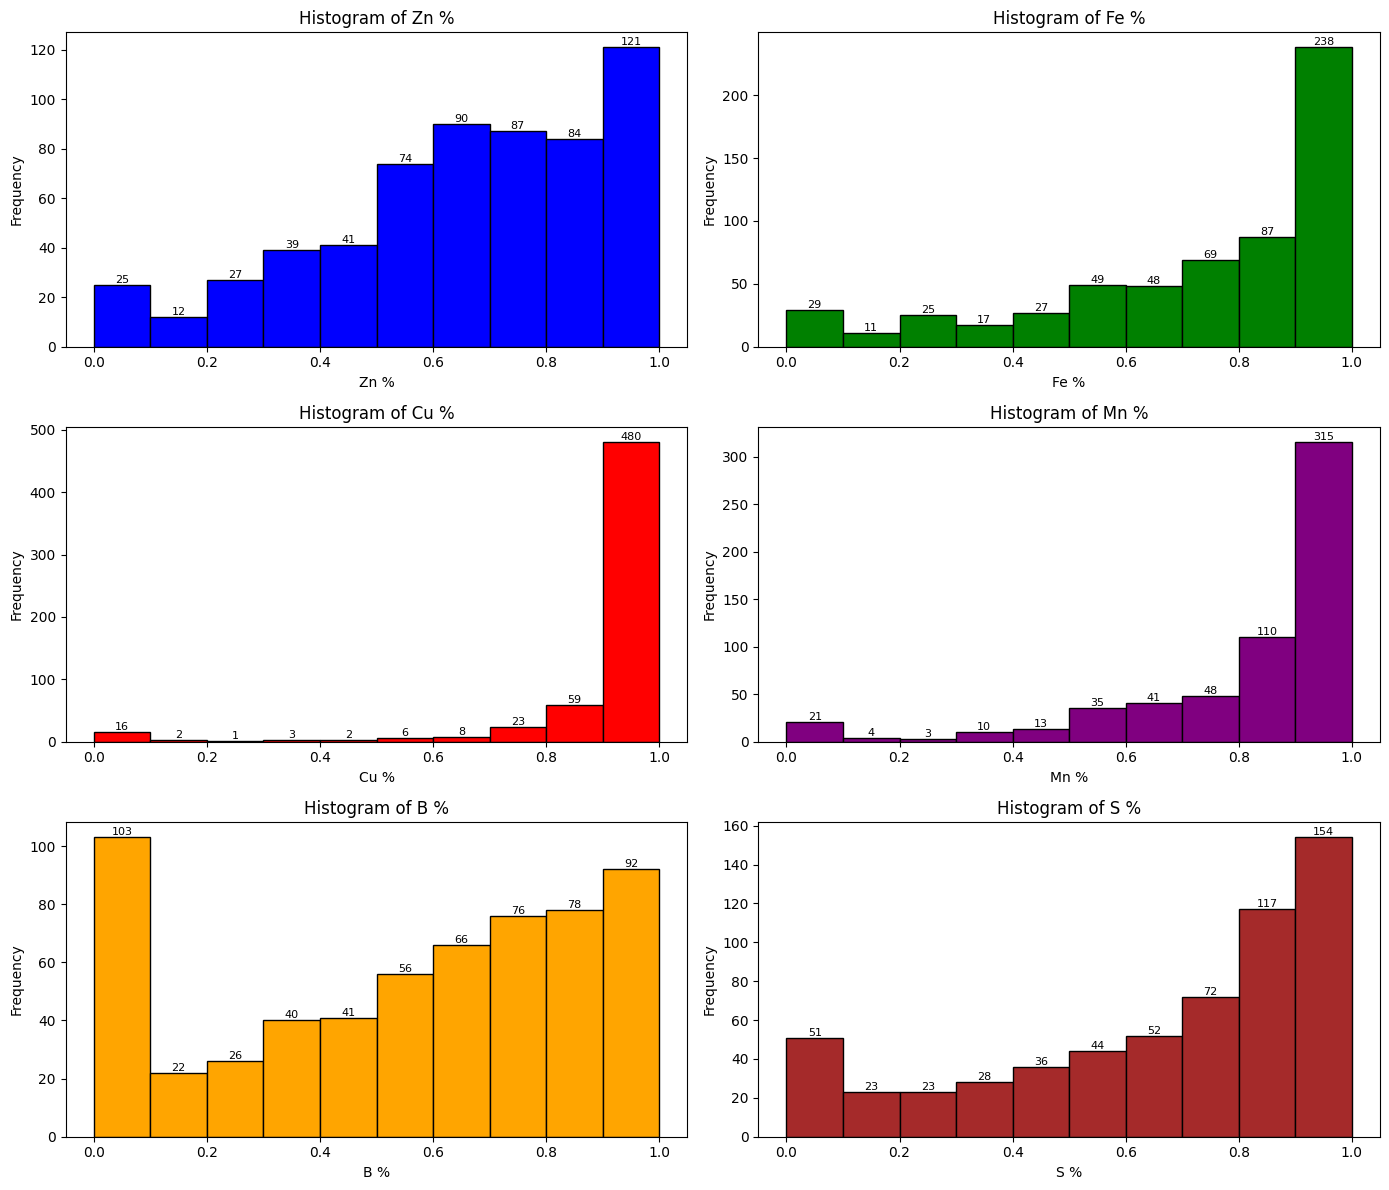

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'soil_data' with columns 'Zn %', 'Fe %', 'Cu %', 'Mn %', 'B %', 'S %'
# Example:
# soil_data = pd.read_csv('your_dataset.csv')

# Create a figure with 3x2 subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# List of columns to plot
columns = ['Zn %', 'Fe %', 'Cu %', 'Mn %', 'B %', 'S %']

# Define colors for histograms
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

# Loop through each column and plot histogram
for i, (column, color) in enumerate(zip(columns, colors)):
    row = i // 2
    col = i % 2
    counts, bins, _ = axs[row, col].hist(soil_data[column], bins=10, edgecolor='black', color=color)
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title(f'Histogram of {column}')
    #axs[row, col].grid(True)

    # Adding annotations (counts)
    for count, bin_edge in zip(counts, bins):
        if count > 0:
            axs[row, col].text(bin_edge + 0.05 , count, int(count), ha='center', va='bottom', fontsize=8)

# Adjust layout
plt.tight_layout()
plt.show()


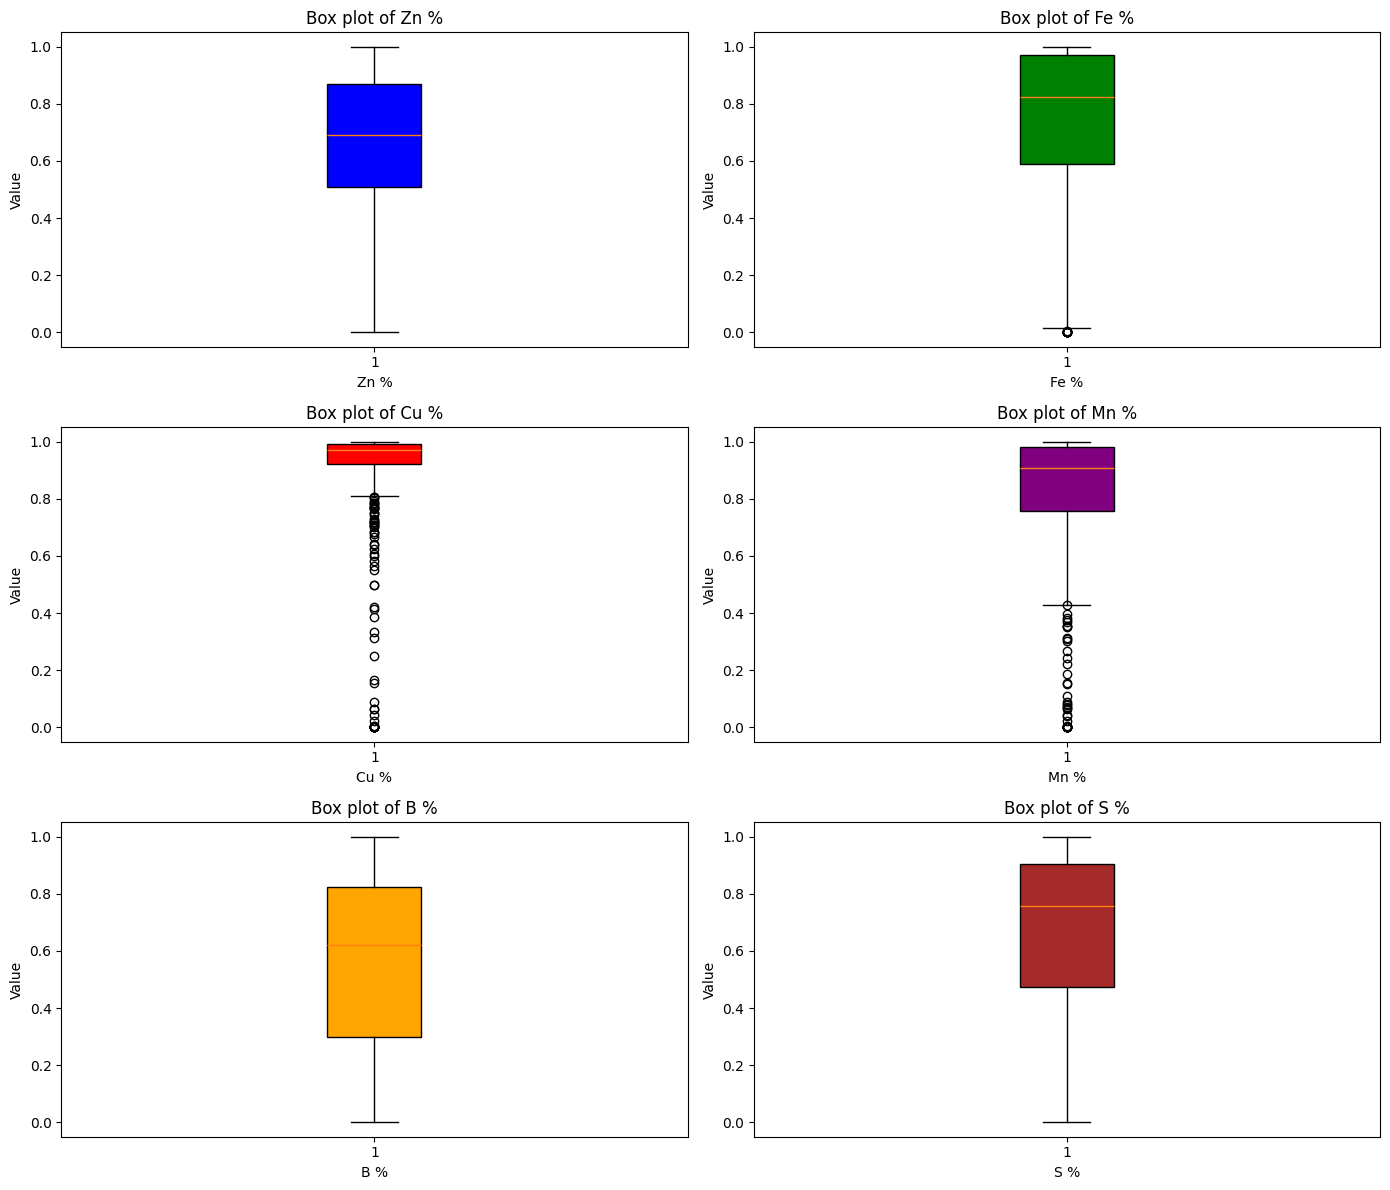

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'soil_data' with columns 'Zn %', 'Fe %', 'Cu %', 'Mn %', 'B %', 'S %'
# Example:
# soil_data = pd.read_csv('your_dataset.csv')

# Create a figure with 3x2 subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# List of columns to plot
columns = ['Zn %', 'Fe %', 'Cu %', 'Mn %', 'B %', 'S %']

# Define colors for box plots
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

# Loop through each column and plot box plot
for i, (column, color) in enumerate(zip(columns, colors)):
    row = i // 2
    col = i % 2
    axs[row, col].boxplot(soil_data[column], patch_artist=True, boxprops=dict(facecolor=color))
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Value')
    axs[row, col].set_title(f'Box plot of {column}')
    #axs[row, col].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


### It is evident from the Box-plot is Cu and Mn are largely affected by outliers. Even from soil fertility and nutrition point-of-view, Cu and Mn are much less importantly sought after, therefore no harm to NOT-INCLUDING them into the clustering

## Ward Linkage for Dendogram

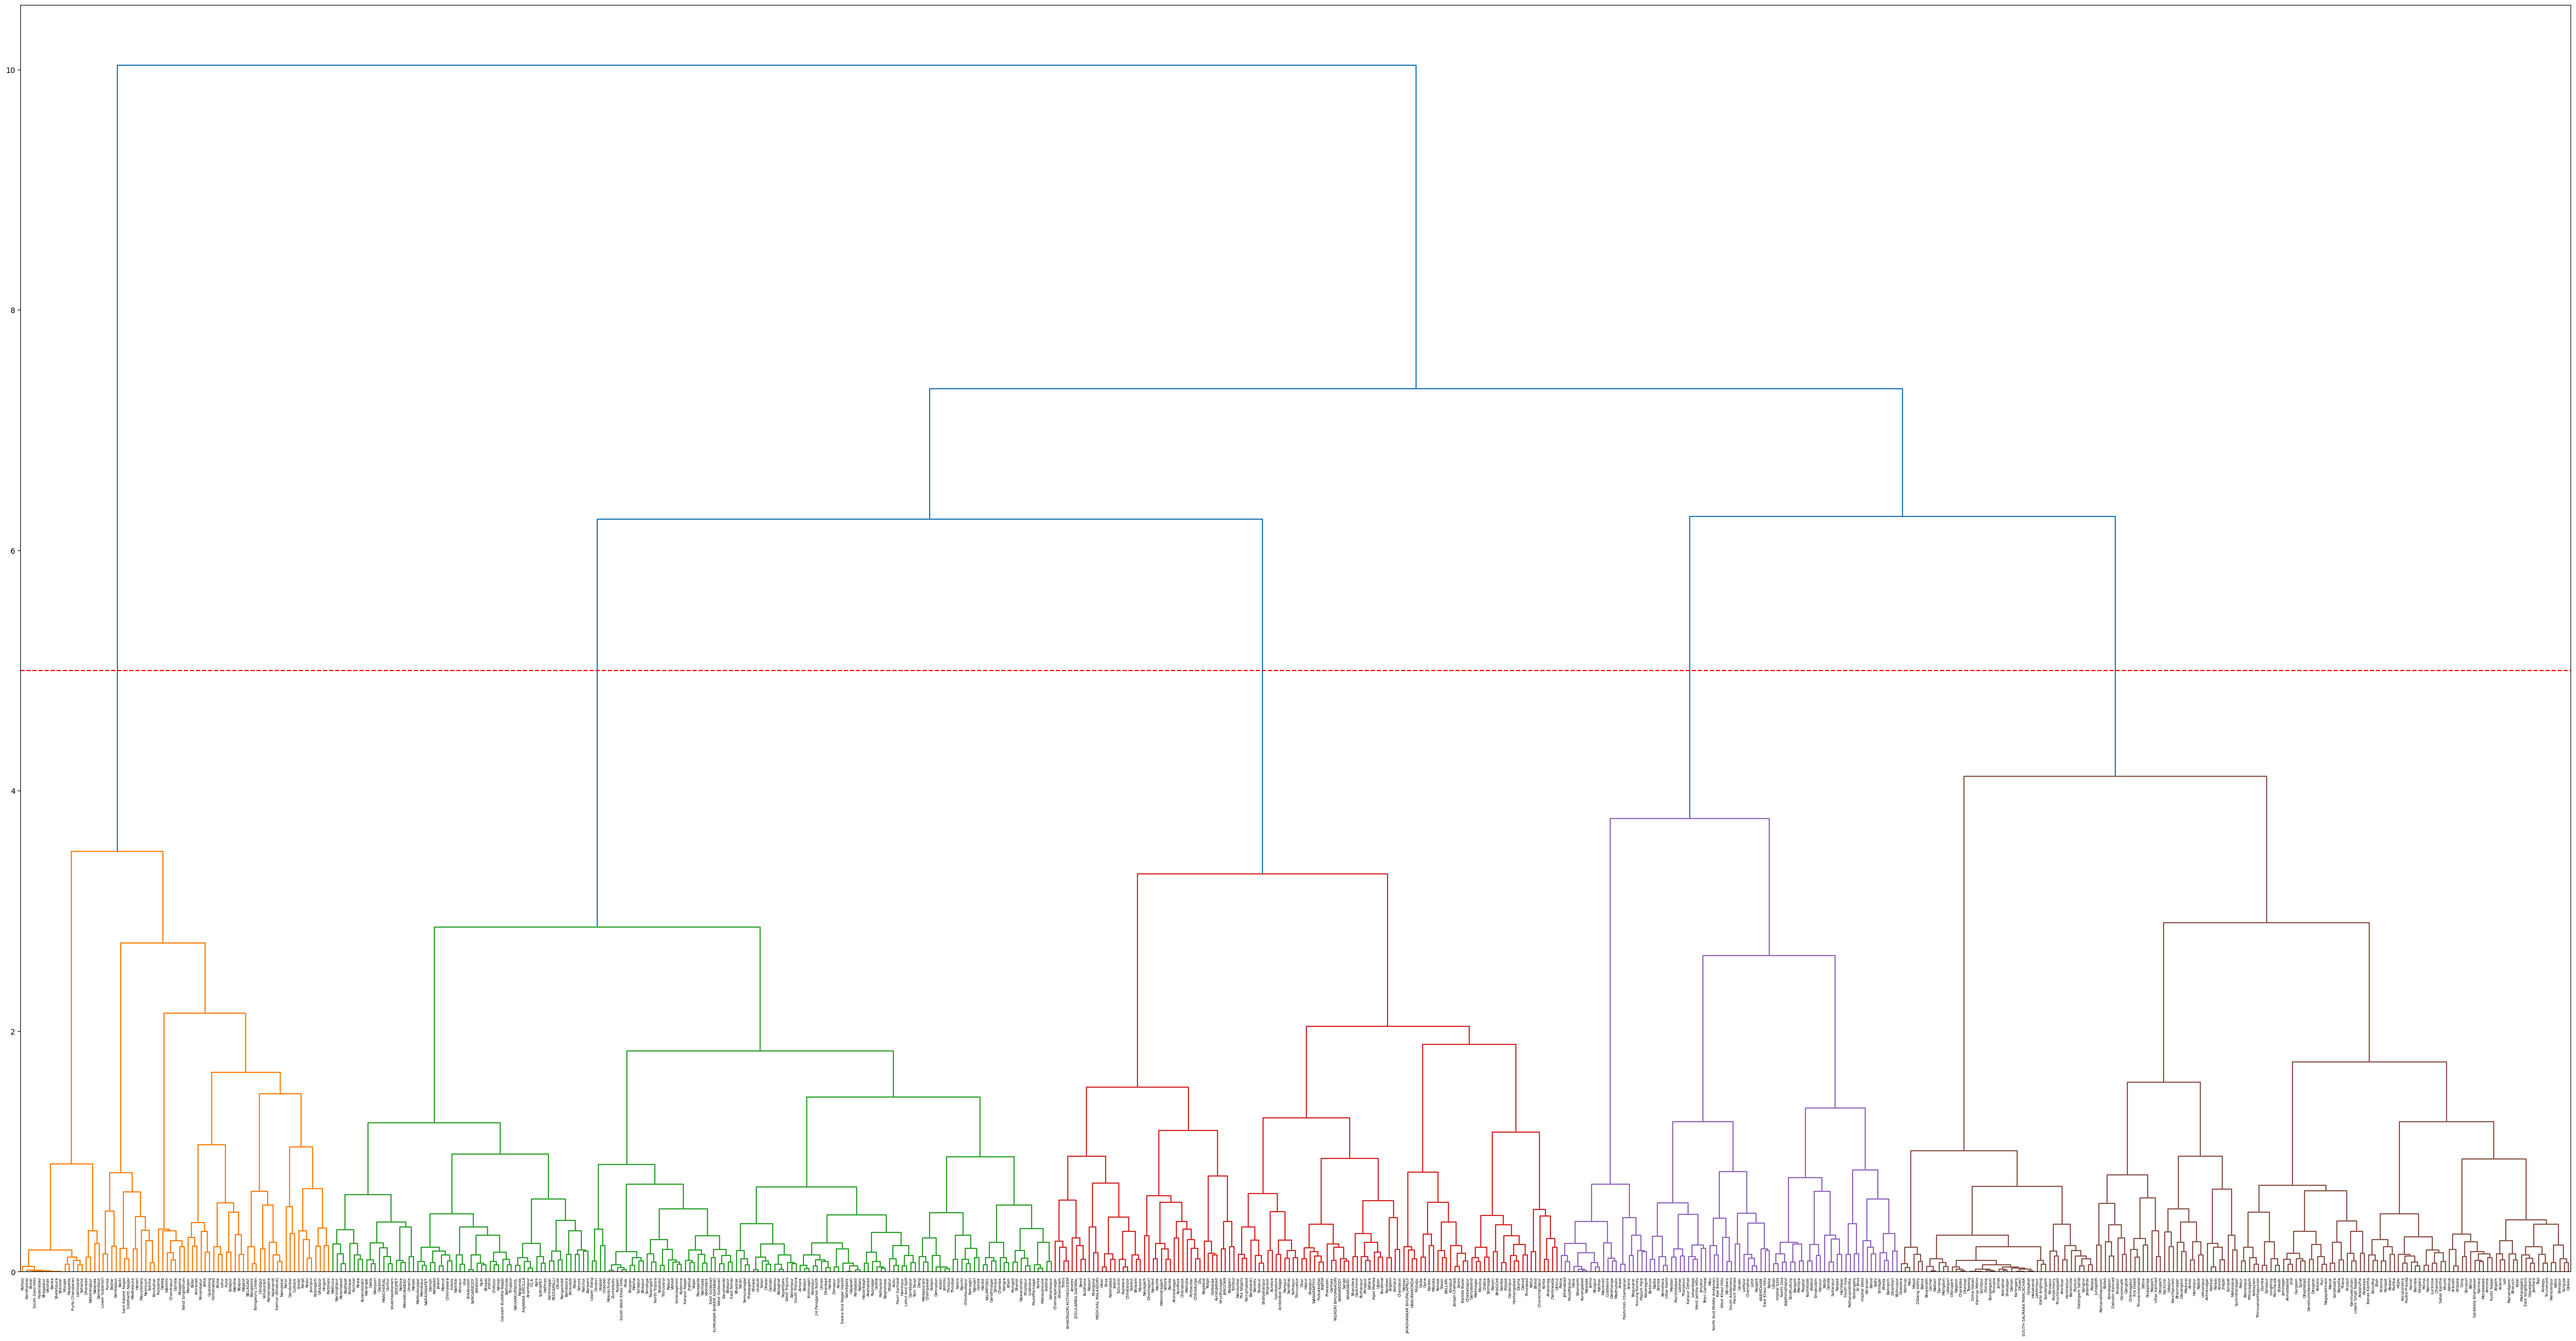

In [9]:
#Drawing the dendogram
features = ['Zn %', 'Fe %', 'B %', 'S %']
custom_labels = soil_data["District"]
plt.figure(figsize=(60, 30)) 
clusters = shc.linkage(soil_data[features],method = 'ward')
shc.dendrogram(clusters, labels=custom_labels.tolist(),color_threshold=6)
plt.axhline(y = 5, color = 'r', linestyle = '--')
plt.show()

In [10]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Assuming soil_data is a DataFrame and features is a list of column names
clustering_model_1 = AgglomerativeClustering(n_clusters=5, linkage='ward', metric='euclidean')
clustering_model_1.fit(soil_data[features])
data_labels_1 = clustering_model_1.labels_
print(f'Silhouette score :{silhouette_score(soil_data[features],data_labels_1)} ')

# Print the number of data points in each cluster
for cluster_num in range(clustering_model_1.n_clusters):
    count = (data_labels_1 == cluster_num).sum()
    print(f'Cluster {cluster_num + 1}: {count} data points')

# Adjust cluster labels to start from 1
soil_data['Cluster'] = data_labels_1 + 1

# List to hold the data for each cluster
cluster_data_list = []

# Function to calculate statistics and format them as a string
def calculate_statistics(cluster_data, col):
    mean_val = cluster_data[col].mean()
    mode_val = cluster_data[col].mode().iloc[0] if not cluster_data[col].mode().empty else 'N/A'
    median_val = cluster_data[col].median()
    return f'{col} for Cluster {cluster_num} : Mean = {mean_val:.2f}; Median = {median_val:.2f}; Mode = {mode_val}'

# Iterate over each cluster and append data to the list
for cluster_num in range(1, clustering_model_1.n_clusters + 1):
    cluster_data = soil_data[soil_data['Cluster'] == cluster_num]
    cluster_data_list.append(cluster_data)
    
    # Create DataFrame for statistics
    stats_data = {col: calculate_statistics(cluster_data, col) for col in features}
    stats_df = pd.DataFrame(stats_data, index=[0])
    
    # Insert statistics DataFrame after the cluster data
    cluster_data_list.append(stats_df)
    
    # Append an empty DataFrame to create a blank row
    cluster_data_list.append(pd.DataFrame([[''] * (soil_data.shape[1] + 1)], columns=list(soil_data.columns) + ['Statistics']))

# Concatenate all cluster data
final_data = pd.concat(cluster_data_list, ignore_index=True)

# Save to an Excel file with a different name to avoid permission issues
final_data.to_excel('clusters_with_statistics_v2.xlsx', index=False)

print('Data saved to clusters_with_statistics_v2.xlsx')


Silhouette score :0.23090963411434876 
Cluster 1: 158 data points
Cluster 2: 80 data points
Cluster 3: 119 data points
Cluster 4: 73 data points
Cluster 5: 170 data points
Data saved to clusters_with_statistics_v2.xlsx


## Testing with other linkages 

## Single Linkage

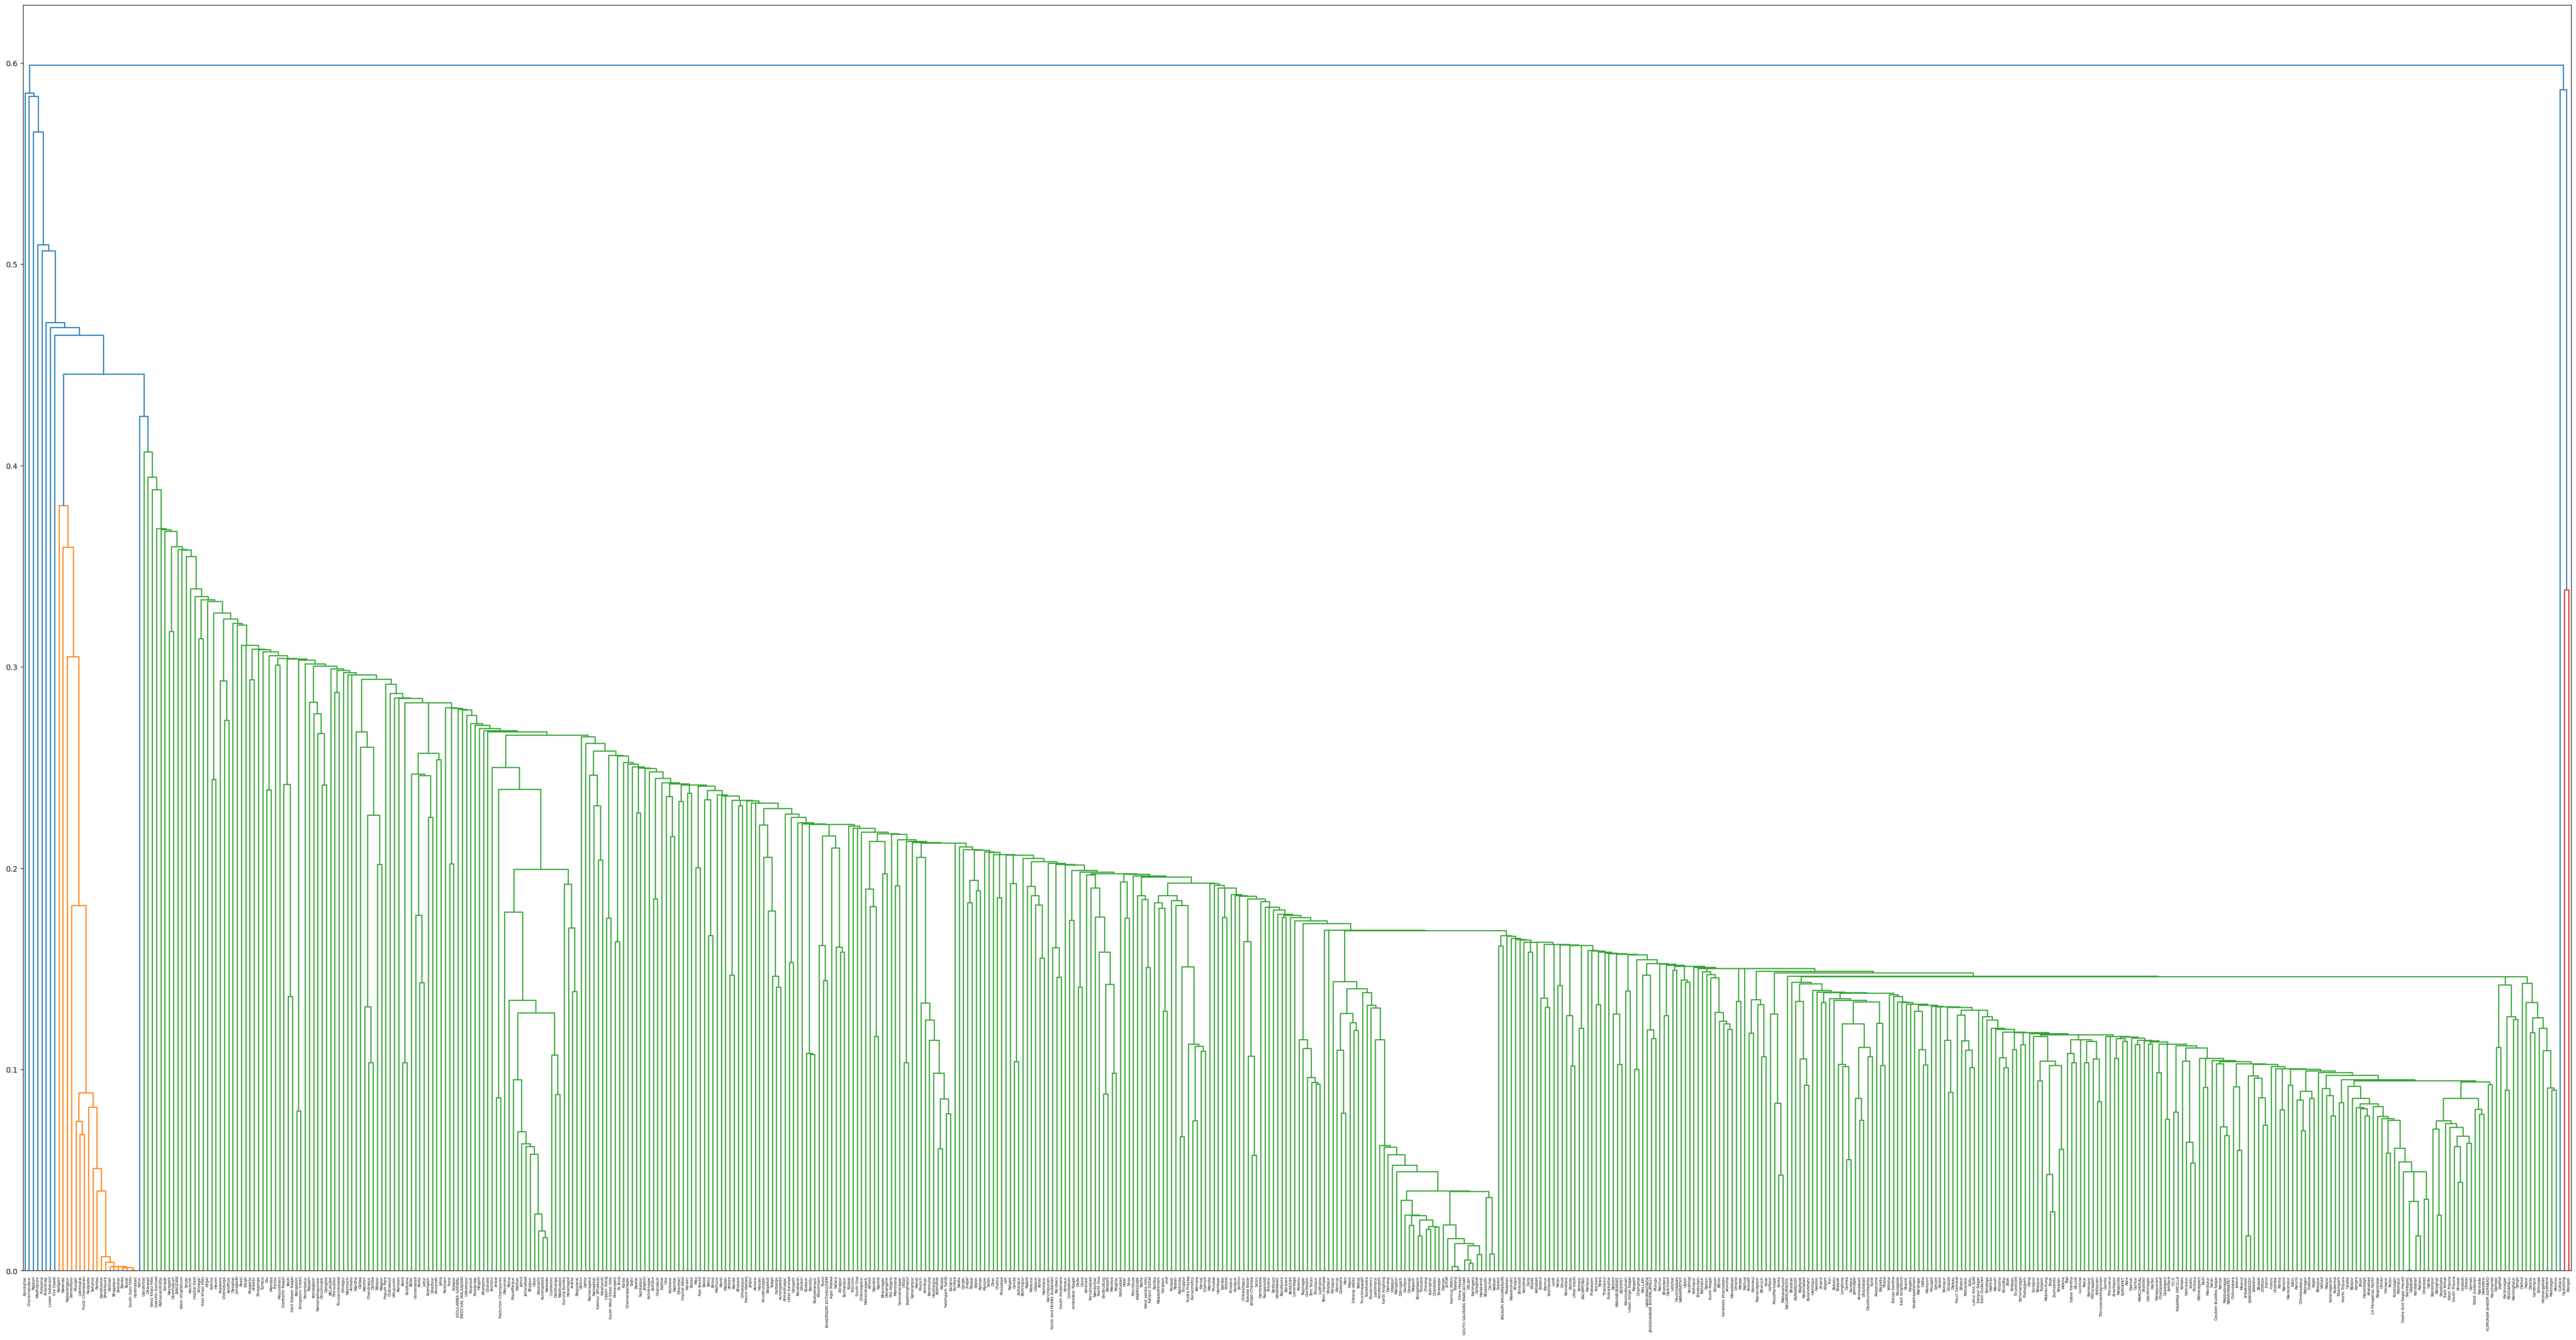

In [11]:
#Drawing the dendogram
features = ['Zn %', 'Fe %', 'Cu %', 'Mn %', 'B %', 'S %']
custom_labels = soil_data["District"]
plt.figure(figsize=(60, 30)) 
clusters = shc.linkage(soil_data[features],method = 'single')
shc.dendrogram(clusters, labels=custom_labels.tolist())
plt.axhline(y = 5, color = 'r', linestyle = '--')
plt.show()

In [12]:
clustering_model_2 = AgglomerativeClustering(n_clusters=3, linkage='single', metric='euclidean')
clustering_model_2.fit(soil_data[features])
data_labels_2 = clustering_model_2.labels_
c2 = clustering_model_2.fit_predict(soil_data[features])
silhouette_score(soil_data[features],c2)

0.36249682293749413

## Average linkage

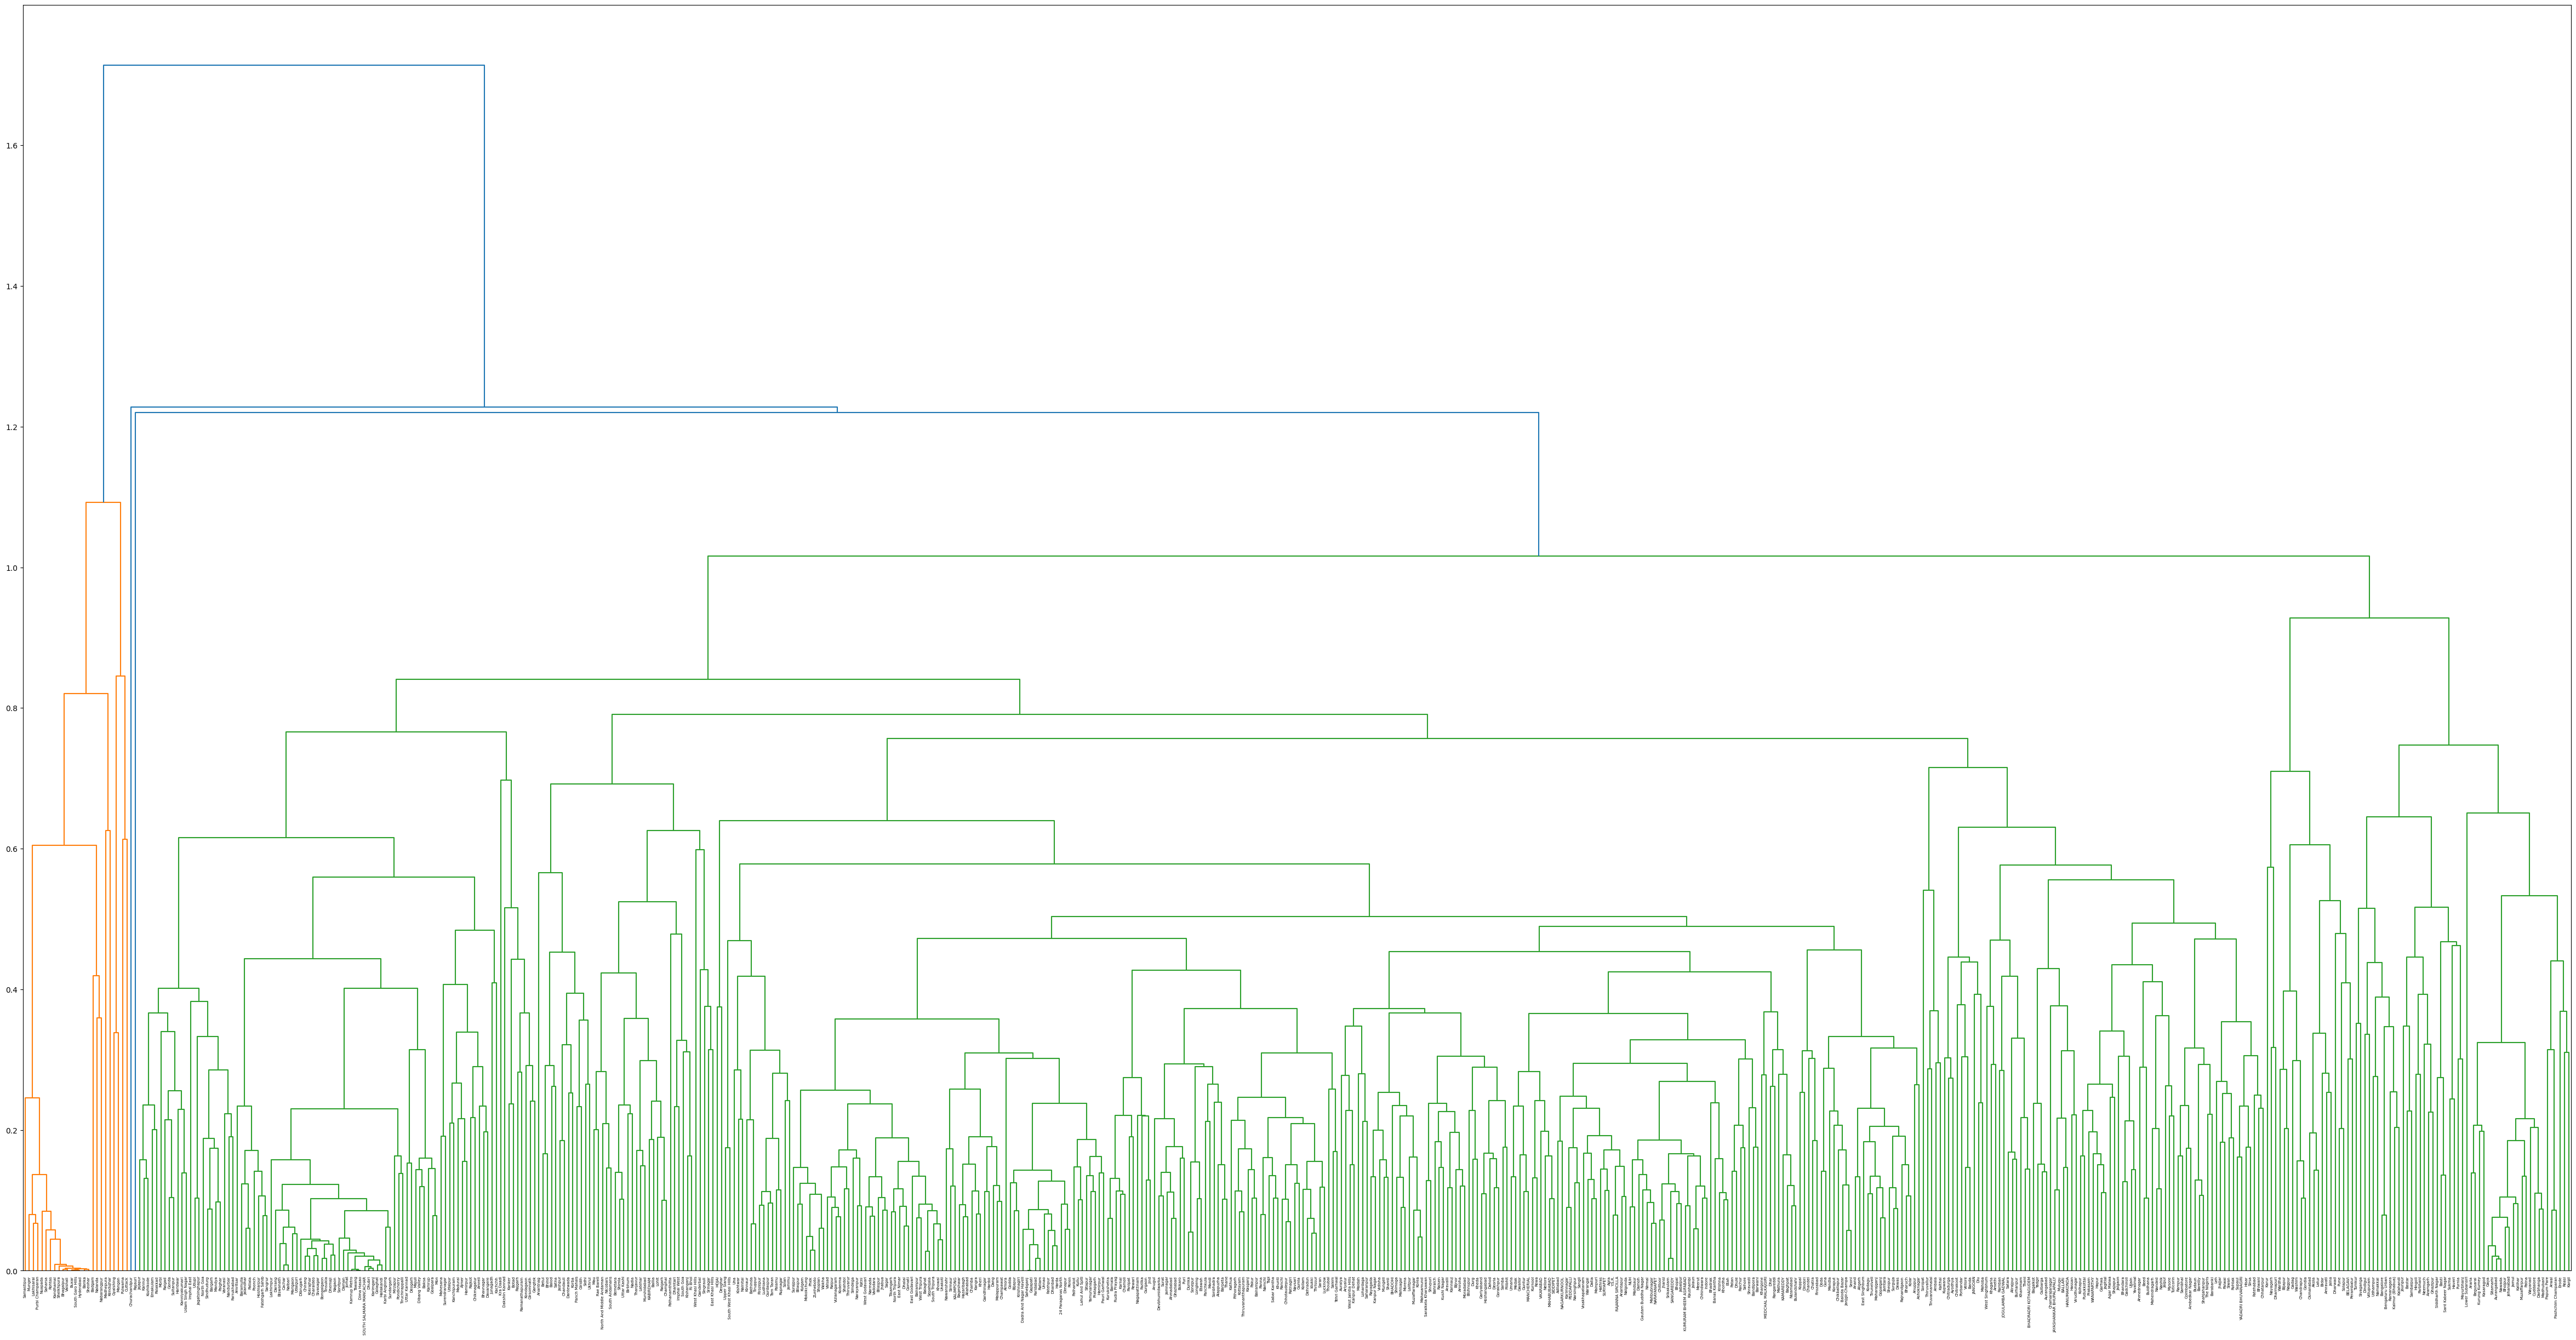

In [13]:
#Drawing the dendogram
features = ['Zn %', 'Fe %', 'Cu %', 'Mn %', 'B %', 'S %']
custom_labels = soil_data["District"]
plt.figure(figsize=(60, 30)) 
clusters = shc.linkage(soil_data[features],method = 'average')
shc.dendrogram(clusters, labels=custom_labels.tolist())
plt.axhline(y = 5, color = 'r', linestyle = '--')
plt.show()

In [14]:
clustering_model_3 = AgglomerativeClustering(n_clusters=3, linkage='average', metric='euclidean')
clustering_model_3.fit(soil_data[features])
data_labels_3 = clustering_model_3.labels_
c3 = clustering_model_3.fit_predict(soil_data[features])
silhouette_score(soil_data[features],data_labels_3)

0.3773096294280883

# Complete Linkage

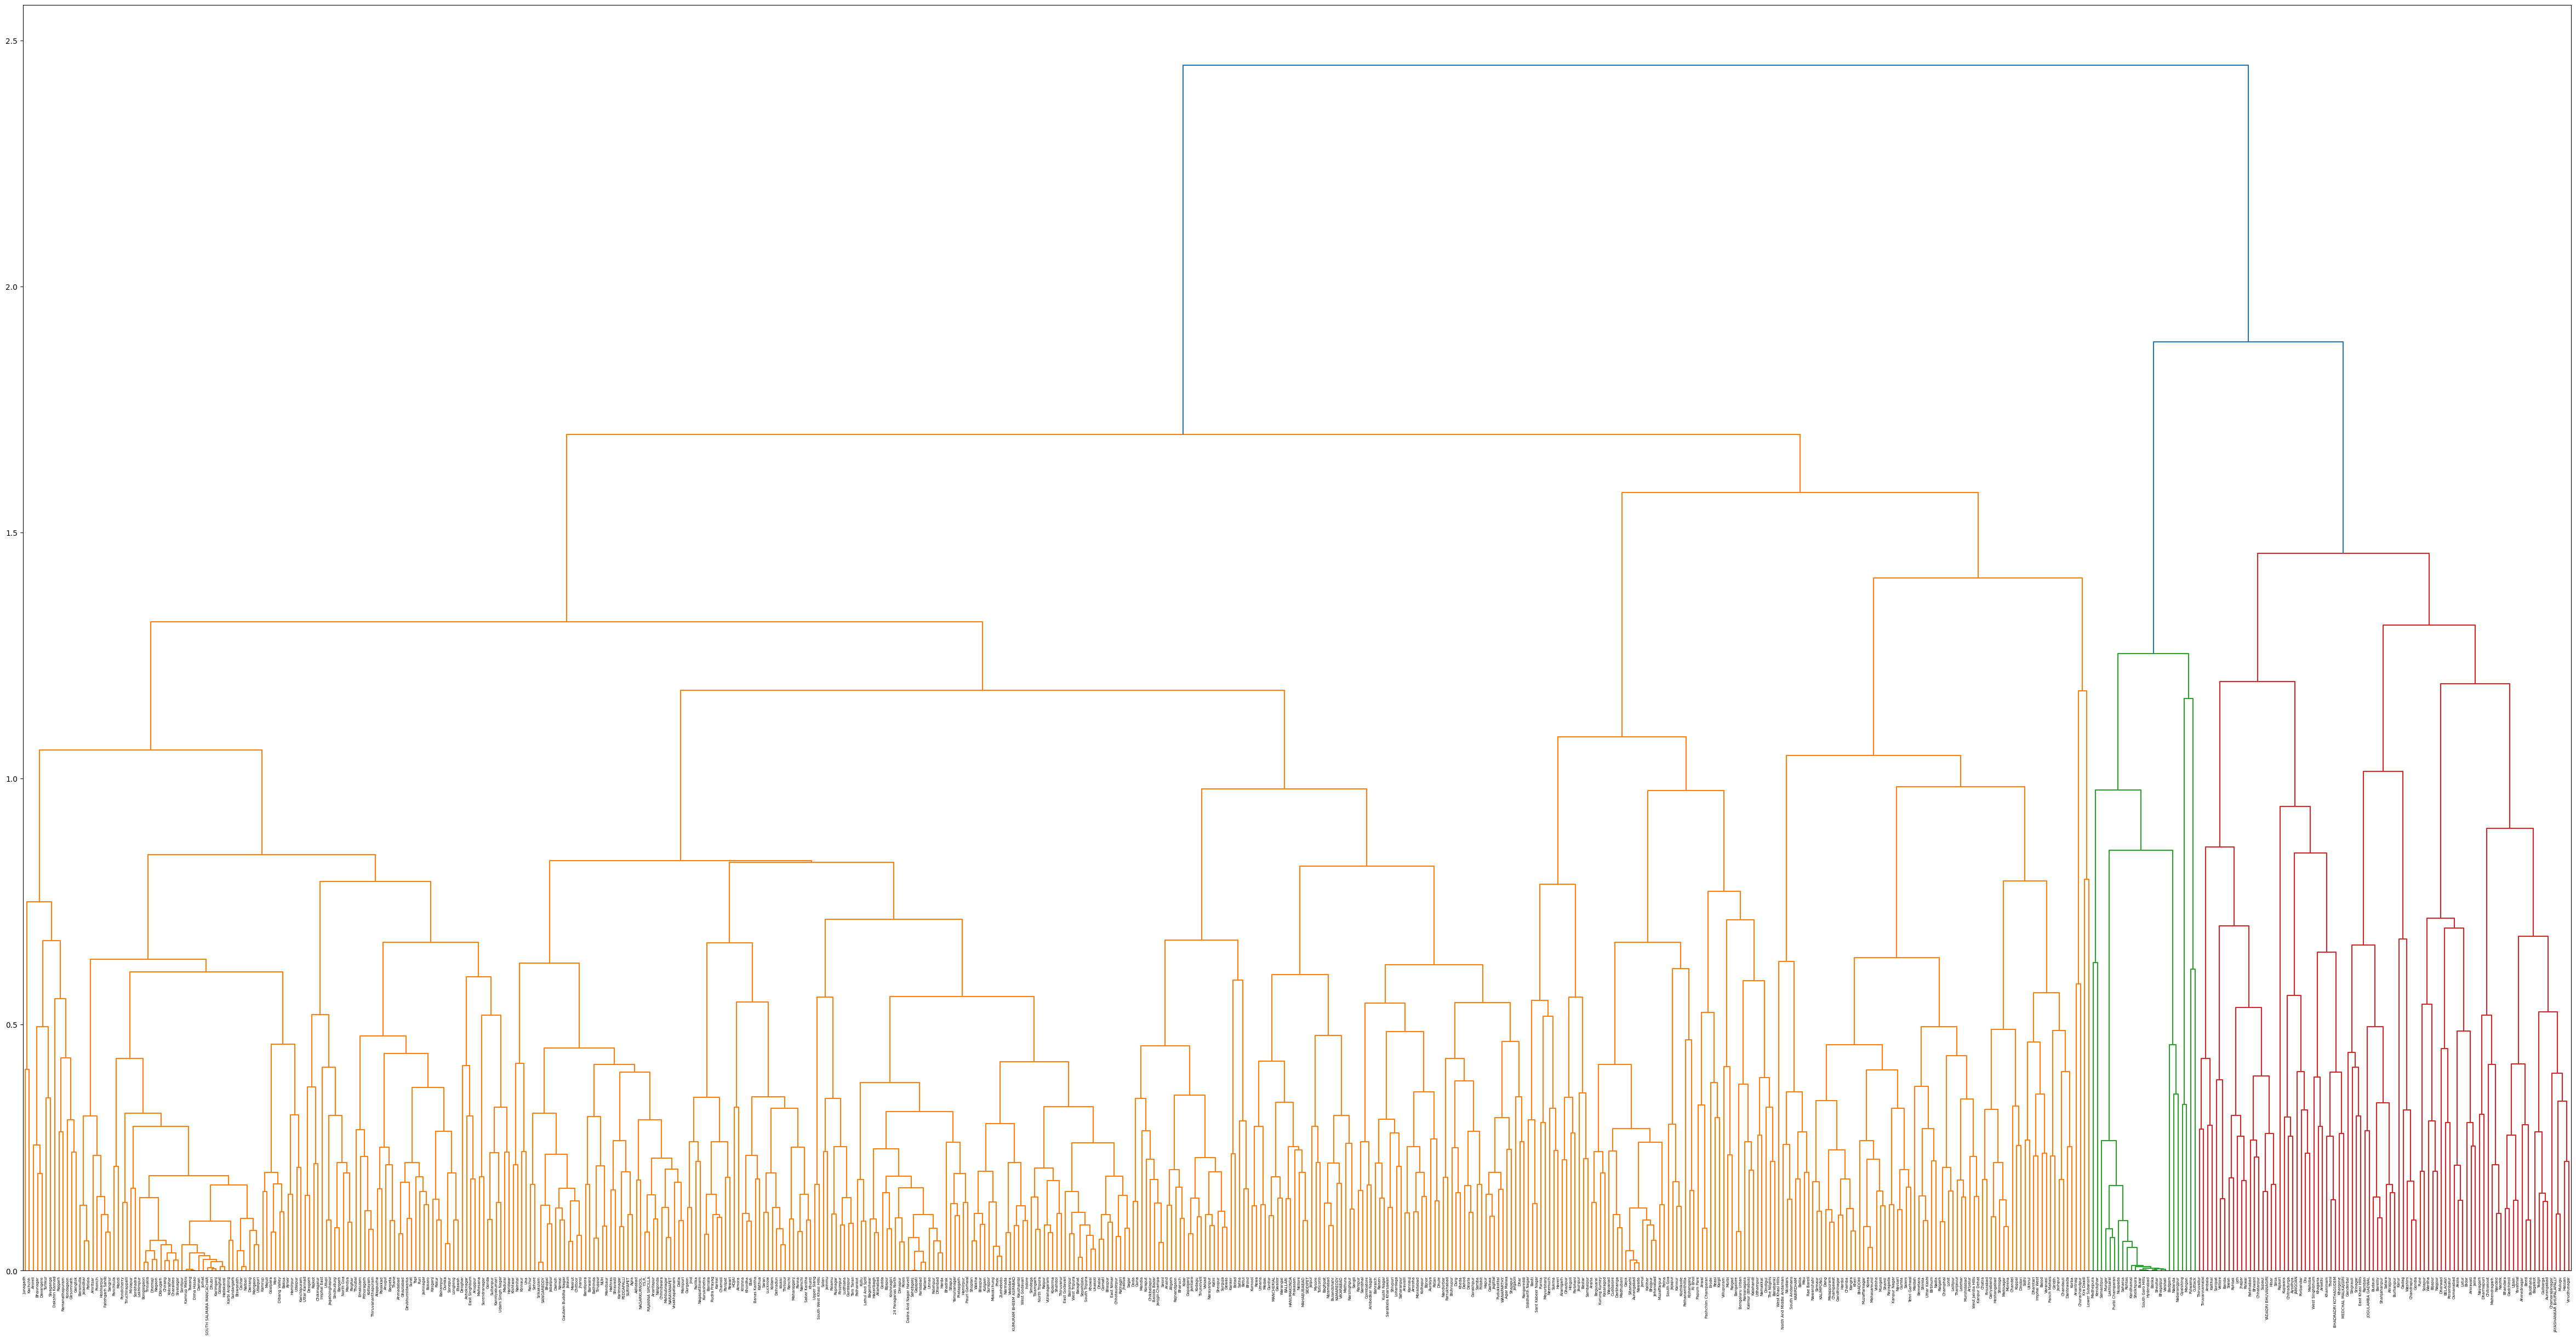

In [15]:
#Drawing the dendogram
features = ['Zn %', 'Fe %', 'Cu %', 'Mn %', 'B %', 'S %']
custom_labels = soil_data["District"]
plt.figure(figsize=(60, 30)) 
clusters = shc.linkage(soil_data[features],method = 'complete')
shc.dendrogram(clusters, labels=custom_labels.tolist())
plt.axhline(y = 5, color = 'r', linestyle = '--')
plt.show()

In [16]:
clustering_model_4 = AgglomerativeClustering(n_clusters=2, linkage='complete', metric='euclidean')
clustering_model_4.fit(soil_data[features])
data_labels_4 = clustering_model_4.labels_
c4 = clustering_model_4.fit_predict(soil_data[features])
silhouette_score(soil_data[features],data_labels_4)

0.3178168078380862